<a href="https://colab.research.google.com/github/ZionOchayon/Machine-Learning-Deep-Learning-Image-Processing/blob/main/KeyPoints_extraction%26TSSCI_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student name ID and Mobile Phone

In [ ]:
StudentName = 'Zion Ochayon'
StudentID = '313351942'
StudentMobile = '052-5650698'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Assigmnent

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


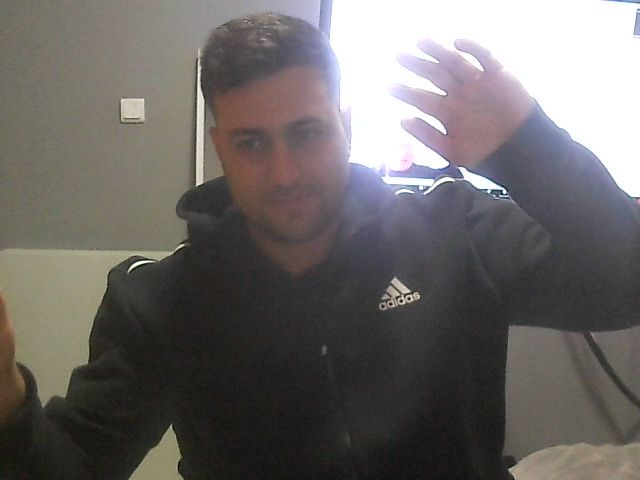

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  print(str(err))

In [ ]:
!pip install mediapipe opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 29.1 MB/s eta 0:00:00


In [ ]:
import mediapipe as mp
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils


In [ ]:
image_path = '/content/photo.jpg'  # Change this path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)


In [ ]:
image_with_skeleton = image.copy()
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image_with_skeleton, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))


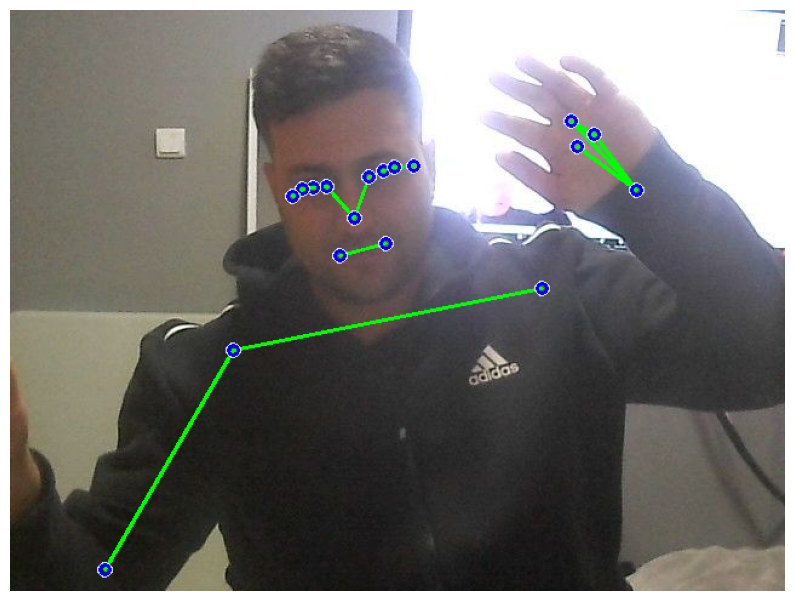

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(image_with_skeleton, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
if results.pose_landmarks:
    # Initialize an empty list to store the landmarks
    keypoints = []
    for landmark in results.pose_landmarks.landmark:
        keypoints.append([landmark.x, landmark.y, landmark.visibility]) # change myself to landmark.visibility

    # Convert the list of keypoints to a 3D NumPy array
    keypoints_array = np.array(keypoints)

    print("Keypoints Array Shape:", keypoints_array.shape)
    print("Keypoints Array:", keypoints_array)


Keypoints Array Shape: (33, 3)
Keypoints Array: [[ 4.44250494e-01  3.59811485e-01  9.99984980e-01]
 [ 4.63404894e-01  2.87990630e-01  9.99969125e-01]
 [ 4.81668174e-01  2.78818309e-01  9.99977708e-01]
 [ 4.95718658e-01  2.71457404e-01  9.99966860e-01]
 [ 4.08792585e-01  3.05751145e-01  9.99968410e-01]
 [ 3.91635925e-01  3.07827055e-01  9.99972343e-01]
 [ 3.77131820e-01  3.09810460e-01  9.99960184e-01]
 [ 5.20669460e-01  2.70500362e-01  9.99989152e-01]
 [ 3.64130080e-01  3.22718501e-01  9.99985218e-01]
 [ 4.85895157e-01  4.02210057e-01  9.99989867e-01]
 [ 4.26190436e-01  4.24100578e-01  9.99982476e-01]
 [ 6.87416613e-01  4.79777455e-01  9.99945164e-01]
 [ 2.88946480e-01  5.86787581e-01  9.99814451e-01]
 [ 1.00084949e+00  5.78125954e-01  9.98320043e-01]
 [ 1.22383572e-01  9.63841796e-01  9.73722875e-01]
 [ 8.08066845e-01  3.11656475e-01  9.99696612e-01]
 [-1.65529251e-02  8.40245605e-01  9.97851253e-01]
 [ 7.53196955e-01  2.16292992e-01  9.98091519e-01]
 [-6.12390637e-02  7.21156299e-01 

In [ ]:
# Assuming keypoints_array is the 3D array obtained from the previous step
# Define the specified order of indices
indices_order = [0, 4, 5, 6, 8, 6, 5, 4, 0, 1, 2, 3, 7, 3, 2, 1, 0, 9, 11, 13, 15, 21, 19, 17, 15, 13, 11, 23, 25, 27, 31, 29, 23, 11, 12, 24, 26, 28, 30, 32, 28, 26, 24, 12, 14, 16, 18, 20, 22, 14, 12, 10, 0]

# Initialize an empty list to store the reordered keypoints
reordered_keypoints = []

# Iterate through the specified order and fetch the keypoints
for index in indices_order:
    if index < len(keypoints_array):
        reordered_keypoints.append(keypoints_array[index])
    else:
        print(f"Index {index} is out of bounds for the keypoints array with length {len(keypoints_array)}.")
        reordered_keypoints.append([0, 0, 0])  # Append a placeholder or handle the error as needed

# Convert the list to a NumPy array
reordered_keypoints_array = np.array(reordered_keypoints)

print("Reordered Keypoints Array Shape:", reordered_keypoints_array.shape)
print("Reordered Keypoints Array:", reordered_keypoints_array)


Reordered Keypoints Array Shape: (53, 3)
Reordered Keypoints Array: [[ 4.44250494e-01  3.59811485e-01  9.99984980e-01]
 [ 4.08792585e-01  3.05751145e-01  9.99968410e-01]
 [ 3.91635925e-01  3.07827055e-01  9.99972343e-01]
 [ 3.77131820e-01  3.09810460e-01  9.99960184e-01]
 [ 3.64130080e-01  3.22718501e-01  9.99985218e-01]
 [ 3.77131820e-01  3.09810460e-01  9.99960184e-01]
 [ 3.91635925e-01  3.07827055e-01  9.99972343e-01]
 [ 4.08792585e-01  3.05751145e-01  9.99968410e-01]
 [ 4.44250494e-01  3.59811485e-01  9.99984980e-01]
 [ 4.63404894e-01  2.87990630e-01  9.99969125e-01]
 [ 4.81668174e-01  2.78818309e-01  9.99977708e-01]
 [ 4.95718658e-01  2.71457404e-01  9.99966860e-01]
 [ 5.20669460e-01  2.70500362e-01  9.99989152e-01]
 [ 4.95718658e-01  2.71457404e-01  9.99966860e-01]
 [ 4.81668174e-01  2.78818309e-01  9.99977708e-01]
 [ 4.63404894e-01  2.87990630e-01  9.99969125e-01]
 [ 4.44250494e-01  3.59811485e-01  9.99984980e-01]
 [ 4.85895157e-01  4.02210057e-01  9.99989867e-01]
 [ 6.87416613e

# Part 2, Video - TSSCI

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

def process_video(video_path):
    # Initialize a variable to store the keypoints for all frames
    all_keypoints = []

    # Capture the video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame with MediaPipe Pose
        results = pose.process(frame_rgb)

        # Initialize an array for the current frame's keypoints
        frame_keypoints = np.zeros((33, 3))  # Placeholder for frames with no detection

        if results.pose_landmarks:
            for i, landmark in enumerate(results.pose_landmarks.landmark):
                frame_keypoints[i] = [landmark.x, landmark.y, landmark.visibility]

        all_keypoints.append(frame_keypoints)

    cap.release()

    # Convert the list of all keypoints to a NumPy array
    keypoints_tensor = np.array(all_keypoints)
    return keypoints_tensor

# Use the function with your video path
video_path = '/gdrive/MyDrive/image_processing/video (2160p).mp4'
keypoints_tensor = process_video(video_path)

if keypoints_tensor is not None:
    print("Shape of keypoints tensor:", keypoints_tensor.shape)
else:
    print("Failed to process video.")


Shape of keypoints tensor: (306, 33, 3)


In [ ]:
def reorder_and_normalize_keypoints(keypoints_tensor):
    # Specified index order for reordering
    indices_order = [0, 4, 5, 6, 8, 6, 5, 4, 0, 1, 2, 3, 7, 3, 2, 1, 0, 9, 11, 13, 15, 21, 19, 17, 15, 13, 11, 23, 25, 27, 31, 29, 23, 11, 12, 24, 26, 28, 30, 32, 28, 26, 24, 12, 14, 16, 18, 20, 22, 14, 12, 10, 0]
    num_frames = keypoints_tensor.shape[0]

    # Initialize a new array for reordered keypoints
    reordered_tensor = np.zeros((num_frames, 53, 3))

    for frame_idx in range(num_frames):
        for i, index in enumerate(indices_order):
            if index < keypoints_tensor.shape[1]:
                reordered_tensor[frame_idx, i] = keypoints_tensor[frame_idx, index]
            else:
                print(f"Index {index} is out of bounds. Using placeholder.")
                reordered_tensor[frame_idx, i] = [0, 0, 0]  # Placeholder for out-of-bounds indices

    # Normalize to 0-255
    normalized_tensor = np.interp(reordered_tensor, (reordered_tensor.min(), reordered_tensor.max()), (0, 255))

    return normalized_tensor

# Assuming keypoints_tensor is the tensor obtained from the video processing
normalized_keypoints = reorder_and_normalize_keypoints(keypoints_tensor)
print(normalized_keypoints.shape)


(306, 53, 3)


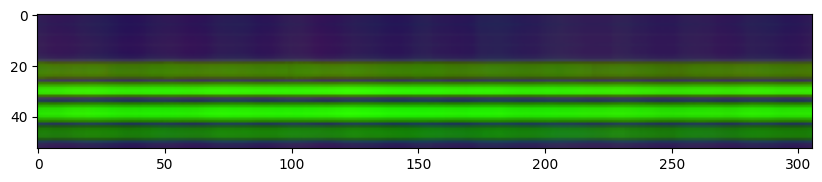

In [ ]:
def build_image_from_frames(normalized_keypoints):
    # Transpose the tensor to get the shape (53, number_of_frames, 3)
    image_data = np.transpose(normalized_keypoints, (1, 0, 2))

    # Ensure the data type is uint8 for image representation
    image_data = image_data.astype(np.uint8)

    return image_data

# Assuming normalized_keypoints is obtained from previous steps
image_from_frames = build_image_from_frames(normalized_keypoints)

# Plotting the resulting image
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.imshow(image_from_frames)
plt.show()
